In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import numpy as np
x=[]
y=[]
for i in range(60):
  num = i+1
  x.append(num)
  y.append(num*10+1) 

In [3]:
df=pd.DataFrame({'Input': x, 'Output': y})
df.head()

,Input,Output
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51


In [4]:
inp=df[["Input"]].values
out=df[["Output"]].values
Input_train,Input_test,Output_train,Output_test=train_test_split(inp,out,test_size=0.33)
Scaler=MinMaxScaler()
Scaler.fit(Input_train)
Scaler.fit(Input_test)
Input_train=Scaler.transform(Input_train)
Input_test=Scaler.transform(Input_test)

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
model=Sequential([Dense(5,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(1)])
model.compile(loss="mse",optimizer="rmsprop")

In [ ]:
history=model.fit(Input_train,Output_train, epochs=4000,batch_size=32)

In [12]:
prediction_test=int(input("Enter the value to predict:"))
preds=model.predict(Scaler.transform([[prediction_test]]))
print("The prediction for the given input "+str(prediction_test)+" is:"+str(int(np.round(preds))))

Enter the value to predict:35
The prediction for the given input 35 is:351


In [11]:
model.evaluate(Input_test,Output_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.0295


0.029472654685378075

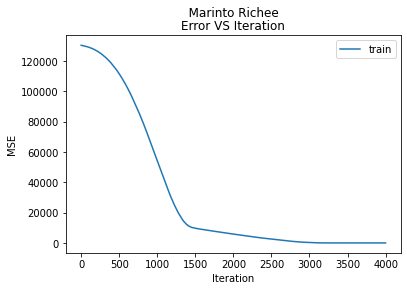

In [10]:

import matplotlib.pyplot as plt
plt.suptitle("   Marinto Richee")
plt.title("Error VS Iteration")
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.plot(pd.DataFrame(history.history))
plt.legend(['train'] )
plt.show()